In [87]:
!ulimit -s unlimited

In [88]:
import os
os.environ['OMP_STACKSIZE'] = '16G'
os.environ['OMP_NUM_THREADS'] = '2'
os.environ['MKL_NUM_THREADS'] = '2'

In [89]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole
import sys, py3Dmol

In [90]:
smiles = 'OC1=CC(C(O)=O)=CC=C1'

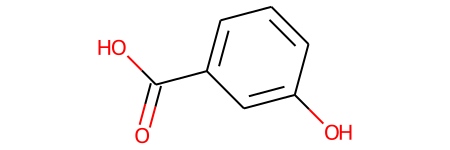

In [91]:
mol = Chem.MolFromSmiles(smiles)
mol

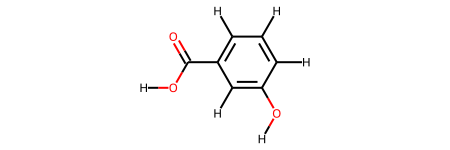

In [92]:
mol_H = Chem.AddHs(mol)
mol_H

In [93]:
mol_3D = mol_H
AllChem.EmbedMolecule(mol_3D, AllChem.ETKDGv3())

0

In [94]:
IPythonConsole.drawMol3D(mol_3D)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [95]:
Chem.MolToXYZFile(mol_3D, 'mol.xyz')

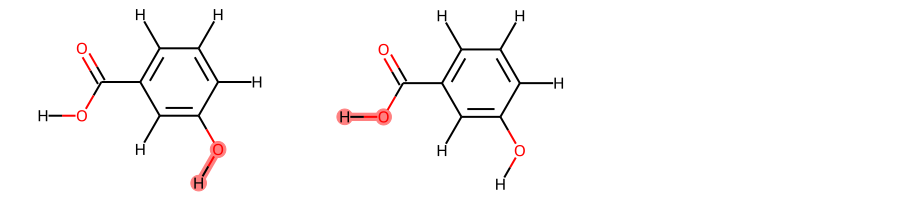

In [96]:
patt = Chem.MolFromSmarts('[NH,nH,OH,oH][H]')
matches = list(mol_3D.GetSubstructMatches(patt))
Draw.MolsToGridImage(
    [Chem.AddHs(mol)]*len(matches),
    highlightAtomLists=matches,
    molsPerRow=3,
    subImgSize=(300,200)
)

In [97]:
with open('run.sh', 'w') as fout:
    fout.write('#!/bin/bash\n')
    for i, match in enumerate(matches):
        fout.write(f'crest mol.xyz --pka {match[1]+1} > crest_{i}.log\n')

In [98]:
! bash run.sh

In [99]:
pKas = []
for i, match in enumerate(matches):
    with open(f'crest_{i}.log', 'r') as fin:
        for line in fin:
            if 'calculated pKa' in line:
                pKas.append(line.split()[4])

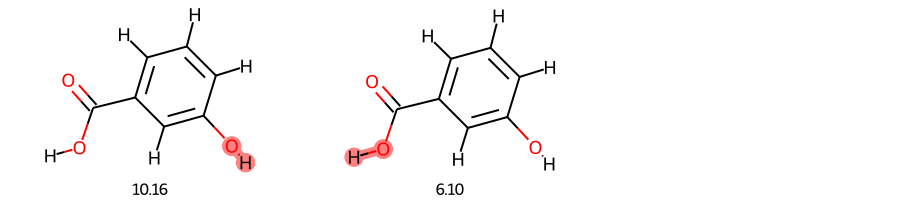

In [100]:
Draw.MolsToGridImage(
    [mol_3D]*len(matches),
    highlightAtomLists=matches,
    legends=pKas,
    molsPerRow=3,
    subImgSize=(300,200)
)